In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Acortar el nombre de las columnas y eliminar la primera fila del dataframe original

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
df= pima.iloc[1:,:]
df

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [7]:
feature_cols = ['pregnant', 'glucose','bp', 'insulin', 'bmi','pedigree','age']
X = df[feature_cols]
Y = df.label

## Bosques Aleatorios

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Creación de grupos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [11]:
rf.score(X_train, Y_train)

1.0

In [12]:
# Score F1 para el grupo de prueba
rf.score(X_test, Y_test)

0.7835497835497836

In [13]:
# Estadisticas de desempeño general
from sklearn.metrics import classification_report

Y_pred = rf.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       146
           1       0.76      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



In [14]:
import numpy as np

def plot_feature_importances(df,model):
    n_features = feature_cols
    plt.barh(n_features, model.feature_importances_, align='center')
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Feature")
    plt.show()

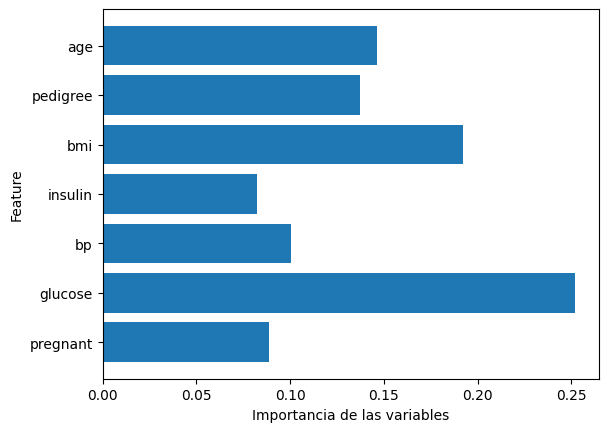

In [15]:
plot_feature_importances(df,rf)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
# creacion de grupos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [19]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbt.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

In [20]:
#Score f1 para el grupo de entrenamiento
gbt.score(X_train, Y_train)

0.9273743016759777